#Summer Olympics Data Analysis Assignment

In [53]:
import pandas as pd
import matplotlib.pyplot as plt

In [54]:
df = pd.read_csv('summer.csv')

In [55]:
df

,Year,City,Sport,Discipline,Athlete,Country,Gender,Event,Medal
0,1896,Athens,Aquatics,Swimming,"HAJOS, Alfred",HUN,Men,100M Freestyle,Gold
1,1896,Athens,Aquatics,Swimming,"HERSCHMANN, Otto",AUT,Men,100M Freestyle,Silver
2,1896,Athens,Aquatics,Swimming,"DRIVAS, Dimitrios",GRE,Men,100M Freestyle For Sailors,Bronze
3,1896,Athens,Aquatics,Swimming,"MALOKINIS, Ioannis",GRE,Men,100M Freestyle For Sailors,Gold
4,1896,Athens,Aquatics,Swimming,"CHASAPIS, Spiridon",GRE,Men,100M Freestyle For Sailors,Silver
...,...,...,...,...,...,...,...,...,...
31160,2012,London,Wrestling,Wrestling Freestyle,"JANIKOWSKI, Damian",POL,Men,Wg 84 KG,Bronze
31161,2012,London,Wrestling,Wrestling Freestyle,"REZAEI, Ghasem Gholamreza",IRI,Men,Wg 96 KG,Gold
31162,2012,London,Wrestling,Wrestling Freestyle,"TOTROV, Rustam",RUS,Men,Wg 96 KG,Silver
31163,2012,London,Wrestling,Wrestling Freestyle,"ALEKSANYAN, Artur",ARM,Men,Wg 96 KG,Bronze


###1. In how many cities Summer Olympics is held so far?

In [76]:
cities = df['City'].unique()
cities

array(['Athens', 'Paris', 'St Louis', 'London', 'Stockholm', 'Antwerp',
       'Amsterdam', 'Los Angeles', 'Berlin', 'Helsinki',
       'Melbourne / Stockholm', 'Rome', 'Tokyo', 'Mexico', 'Munich',
       'Montreal', 'Moscow', 'Seoul', 'Barcelona', 'Atlanta', 'Sydney',
       'Beijing'], dtype=object)

In [77]:
len(cities)

22

###2. Which sport is having most number of Gold Medals so far? (Top 5)

In [57]:
gold = df[df['Medal'] == 'Gold']
gold

,Year,City,Sport,Discipline,Athlete,Country,Gender,Event,Medal
0,1896,Athens,Aquatics,Swimming,"HAJOS, Alfred",HUN,Men,100M Freestyle,Gold
3,1896,Athens,Aquatics,Swimming,"MALOKINIS, Ioannis",GRE,Men,100M Freestyle For Sailors,Gold
6,1896,Athens,Aquatics,Swimming,"HAJOS, Alfred",HUN,Men,1200M Freestyle,Gold
9,1896,Athens,Aquatics,Swimming,"NEUMANN, Paul",AUT,Men,400M Freestyle,Gold
13,1896,Athens,Athletics,Athletics,"BURKE, Thomas",USA,Men,100M,Gold
...,...,...,...,...,...,...,...,...,...
31145,2012,London,Wrestling,Wrestling Freestyle,"NOROOZI, Omid Haji",IRI,Men,Wg 60 KG,Gold
31149,2012,London,Wrestling,Wrestling Freestyle,"KIM, Hyeonwoo",KOR,Men,Wg 66 KG,Gold
31153,2012,London,Wrestling,Wrestling Freestyle,"VLASOV, Roman",RUS,Men,Wg 74 KG,Gold
31157,2012,London,Wrestling,Wrestling Freestyle,"KHUGAEV, Alan",RUS,Men,Wg 84 KG,Gold


In [58]:
sport_gold = pd.DataFrame(gold.groupby('Sport', as_index=False, sort=True)['Medal'].count())
sport_gold.sort_values(by='Medal', ascending=False, inplace=True)
sport_gold

,Sport,Medal
0,Aquatics,1421
2,Athletics,1215
28,Rowing,890
17,Gymnastics,820
14,Fencing,552
15,Football,503
19,Hockey,486
30,Sailing,412
42,Wrestling,391
31,Shooting,384


<function matplotlib.pyplot.show>

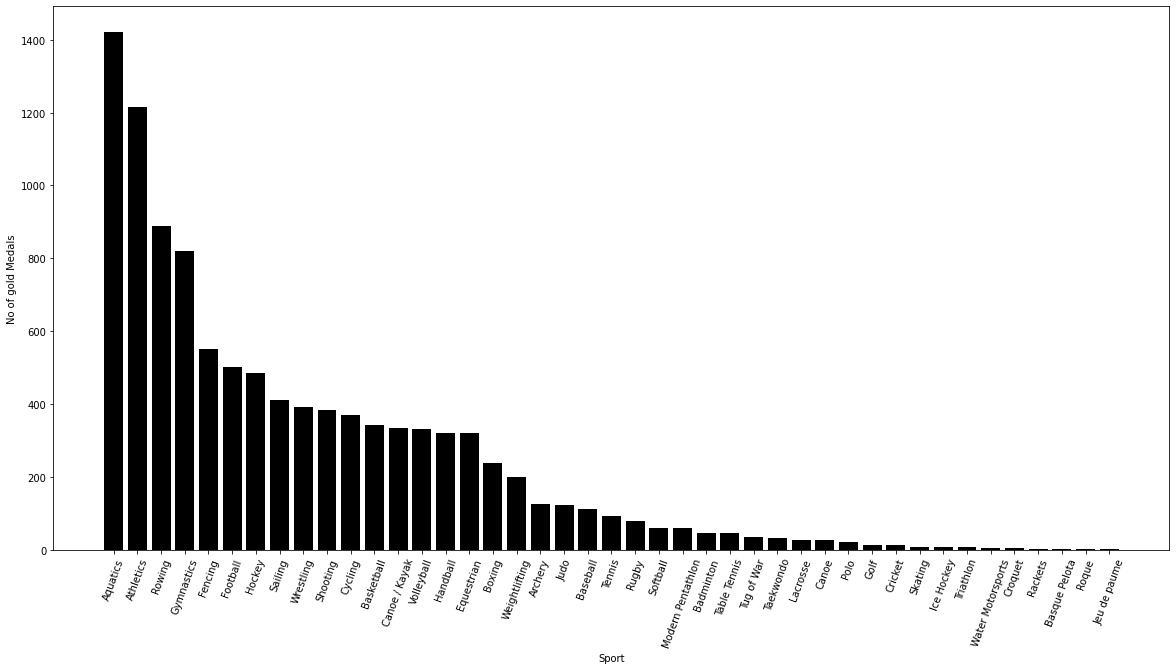

In [59]:
graph = plt.figure(figsize=(20, 10))
plt.bar(sport_gold['Sport'], sport_gold['Medal'], color='black')
plt.xlabel('Sport')
plt.ylabel('No of gold Medals')
plt.xticks(rotation=70)
plt.show

###3. Which sport is having most number of medals so far? (Top 5)

In [60]:
sport_med = pd.DataFrame(df.groupby('Sport', as_index=False, sort=True)['Medal'].count())
sport_med.sort_values(by='Medal', ascending=False, inplace=True)
sport_med

,Sport,Medal
0,Aquatics,4170
2,Athletics,3638
28,Rowing,2667
17,Gymnastics,2307
14,Fencing,1613
15,Football,1497
19,Hockey,1422
42,Wrestling,1212
31,Shooting,1150
30,Sailing,1109


<function matplotlib.pyplot.show>

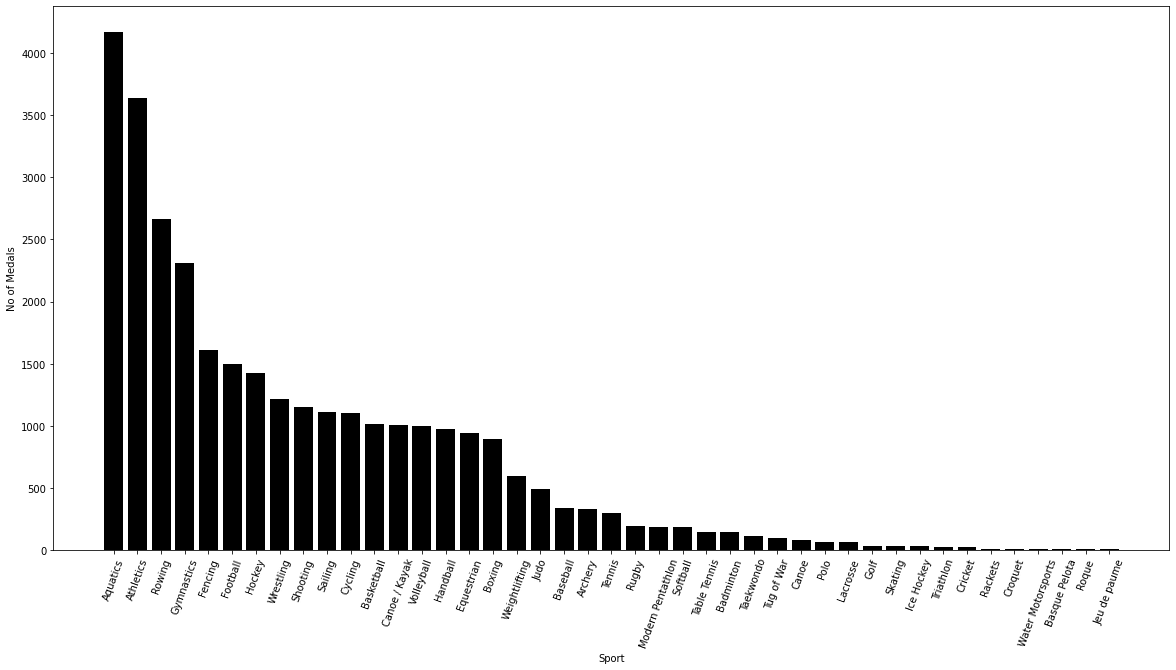

In [61]:
graph = plt.figure(figsize=(20, 10))
plt.bar(sport_med['Sport'], sport_med['Medal'], color='black')
plt.xlabel('Sport')
plt.ylabel('No of Medals')
plt.xticks(rotation=70)
plt.show

###4. Which player has won most number of medals? (Top 5)

In [62]:
play_med = pd.DataFrame(df.groupby('Athlete', as_index=False, sort=True)['Medal'].count())
play_med.sort_values(by='Medal', ascending=False, inplace=True)
play_med

,Athlete,Medal
15702,"PHELPS, Michael",22
11202,"LATYNINA, Larisa",18
511,"ANDRIANOV, Nikolay",15
12476,"MANGIAROTTI, Edoardo",13
14883,"ONO, Takashi",13
...,...,...
8566,"HÜRLIMANN, Ernst",1
8564,"HÜLSENBECK, Sarina",1
8563,"HÜBNER, Frank",1
8562,"HÜBLER, Anna",1


In [63]:
play_med_20 = play_med.head(20)

<function matplotlib.pyplot.show>

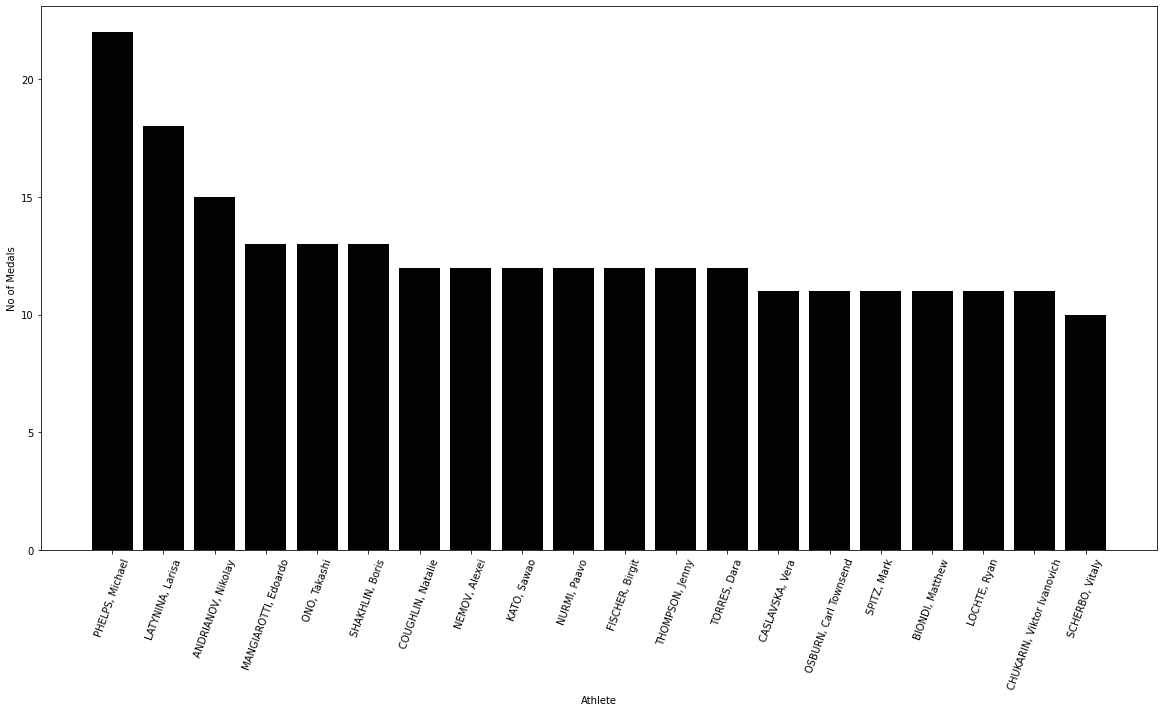

In [64]:
graph = plt.figure(figsize=(20, 10))
plt.bar(play_med_20['Athlete'], play_med_20['Medal'], color='black')
plt.xlabel('Athlete')
plt.ylabel('No of Medals')
plt.xticks(rotation=70)
plt.show

###5. Which player has won most number Gold Medals of medals? (Top 5)

In [65]:
play_gold = pd.DataFrame(gold.groupby('Athlete', as_index=False, sort=True)['Medal'].count())
play_gold.sort_values(by='Medal', ascending=False, inplace=True)
play_gold

,Athlete,Medal
5712,"PHELPS, Michael",18
4186,"LEWIS, Carl",9
5332,"NURMI, Paavo",9
6905,"SPITZ, Mark",9
4066,"LATYNINA, Larisa",9
...,...,...
3029,"HORMANN, Raimund",1
3028,"HORKAI, Gyorgy",1
3026,"HOPP, Karl Heinz",1
3024,"HOOPMAN, Beau",1


In [66]:
play_gold_20 = play_gold.head(20)

<function matplotlib.pyplot.show>

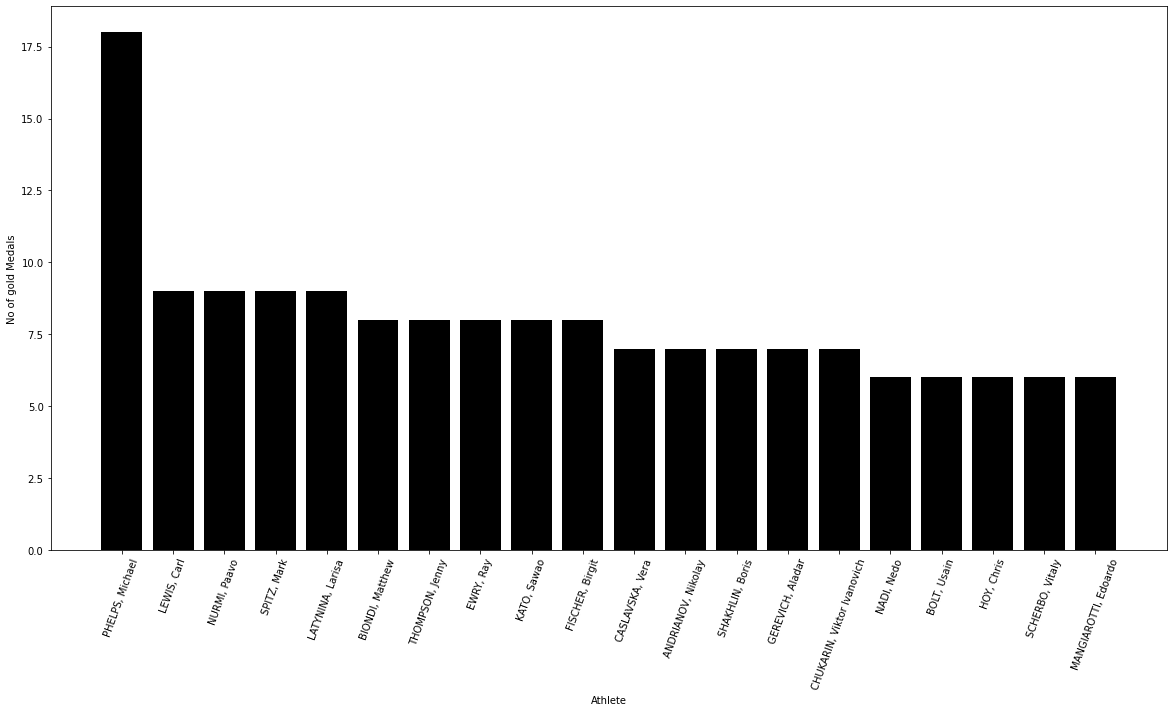

In [67]:
graph = plt.figure(figsize=(20, 10))
plt.bar(play_gold_20['Athlete'], play_gold_20['Medal'], color='black')
plt.xlabel('Athlete')
plt.ylabel('No of gold Medals')
plt.xticks(rotation=70)
plt.show

###6. In which year India won first Gold Medal in Summer Olympics?

In [68]:
gold[gold['Country'] == 'IND']

,Year,City,Sport,Discipline,Athlete,Country,Gender,Event,Medal
5512,1928,Amsterdam,Hockey,Hockey,"ALLEN, Richard James",IND,Men,Hockey,Gold
5513,1928,Amsterdam,Hockey,Hockey,"CHAND, Dyan",IND,Men,Hockey,Gold
5514,1928,Amsterdam,Hockey,Hockey,"GATELEY, Maurice A.",IND,Men,Hockey,Gold
5515,1928,Amsterdam,Hockey,Hockey,"GILL, K. S.",IND,Men,Hockey,Gold
5516,1928,Amsterdam,Hockey,Hockey,"GOODSIR-CULLEN, William John",IND,Men,Hockey,Gold
...,...,...,...,...,...,...,...,...,...
16099,1980,Moscow,Hockey,Hockey,"SINGH, Singh",IND,Men,Hockey,Gold
16100,1980,Moscow,Hockey,Hockey,"SURINDER, Singh",IND,Men,Hockey,Gold
16101,1980,Moscow,Hockey,Hockey,"SYLVANUS, Dung Dung",IND,Men,Hockey,Gold
16102,1980,Moscow,Hockey,Hockey,"ZAFAR, Zafar",IND,Men,Hockey,Gold


###7. Which event is most popular in terms on number of players? (Top 5)

In [69]:
play_event = pd.DataFrame(df.groupby('Event', as_index=False, sort=True)['Athlete'].count())
play_event.sort_values(by='Athlete', ascending=False, inplace=True)
play_event

,Event,Athlete
477,Football,1497
489,Hockey,1422
614,Team Competition,1147
403,Basketball,1012
483,Handball,973
...,...,...
168,47.63 - 52.16KG (Bantamweight),2
424,Class B Up To 60 Feet,2
379,8M Class C,2
550,"Moving Bird Target, 50M",2


In [70]:
play_event_20 = play_event.head(20)

<function matplotlib.pyplot.show>

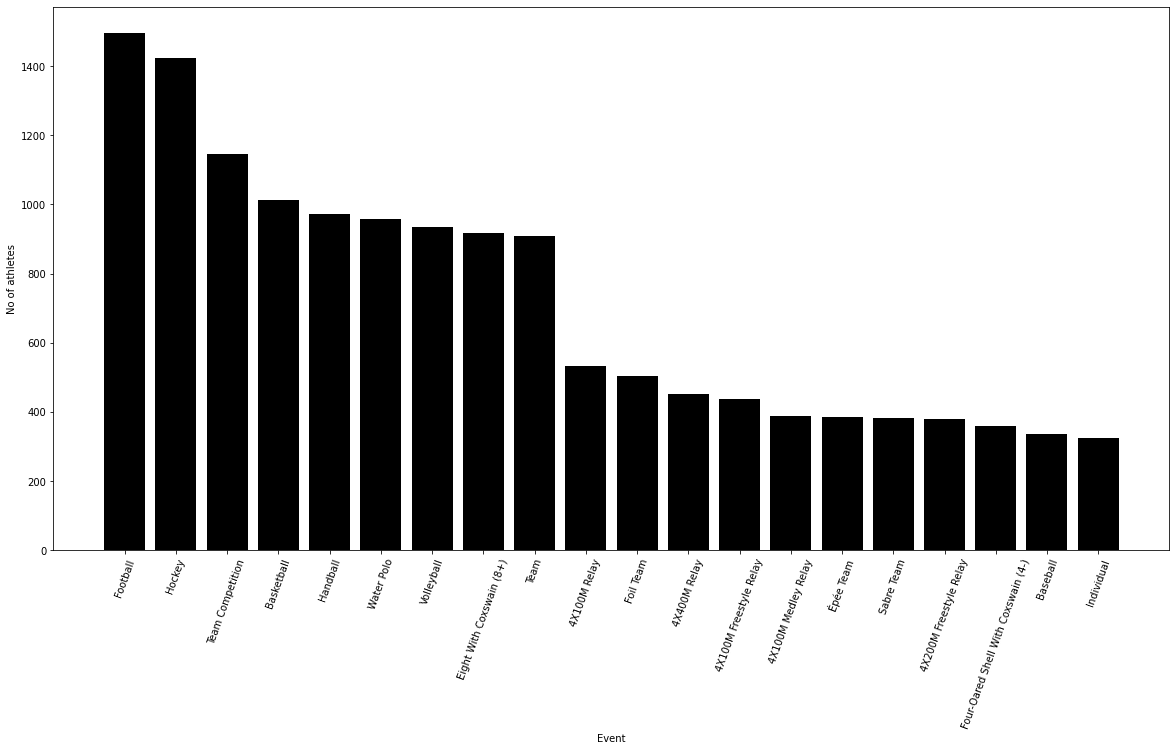

In [71]:
graph = plt.figure(figsize=(20, 10))
plt.bar(play_event_20['Event'], play_event_20['Athlete'], color='black')
plt.xlabel('Event')
plt.ylabel('No of athletes')
plt.xticks(rotation=70)
plt.show

###8. Which sport is having most female Gold Medalists? (Top 5)

In [72]:
fem_gold = gold[gold['Gender'] == 'Women']

In [73]:
sport_fem = pd.DataFrame(fem_gold.groupby('Sport', as_index=False, sort=True)['Athlete'].count())
sport_fem.sort_values(by='Athlete', ascending=False, inplace=True)
sport_fem

,Sport,Athlete
0,Aquatics,589
2,Athletics,389
13,Gymnastics,268
18,Rowing,217
27,Volleyball,166
15,Hockey,144
14,Handball,142
4,Basketball,120
10,Fencing,108
11,Football,86


<function matplotlib.pyplot.show>

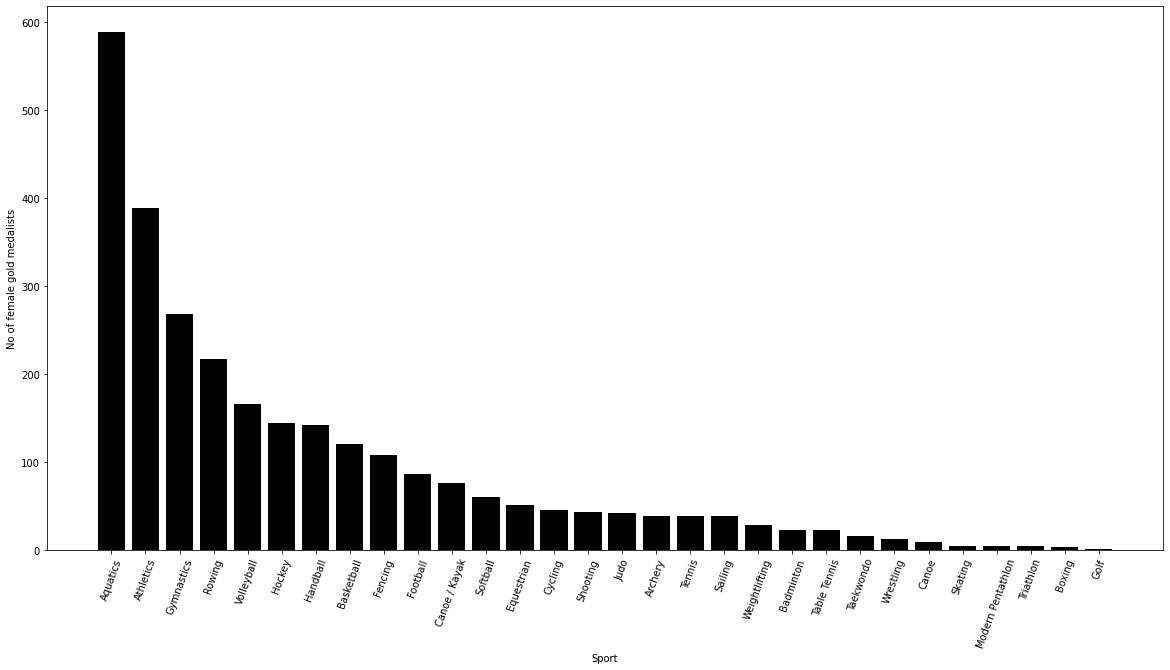

In [74]:
graph = plt.figure(figsize=(20, 10))
plt.bar(sport_fem['Sport'], sport_fem['Athlete'], color='black')
plt.xlabel('Sport')
plt.ylabel('No of female gold medalists')
plt.xticks(rotation=70)
plt.show